In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Loading the Dataset

In [109]:
elec=pd.read_csv("electrical_dataset.csv")

In [110]:
elec.head(5)

,Timestamp,Voltage (V),Current (I),Power (W),Power_Factor,Temperature (°C),Humidity (%)
0,2024-12-01 00:00:00,222.483571,4.642510,965.023943,0.880626,21.734855,45.494834
1,2024-12-01 00:01:00,219.308678,4.206038,894.158159,0.939144,NaN,46.477508
2,2024-12-01 00:02:00,223.238443,4.143615,NaN,0.864156,17.952615,64.195316
3,2024-12-01 00:03:00,227.615149,4.188552,1006.917263,0.926711,19.613098,37.214868
4,2024-12-01 00:04:00,NaN,5.165739,1081.262142,0.931754,21.783244,55.741660


Summarizing the Statistical Data

In [111]:
elec.describe()

,Voltage (V),Current (I),Power (W),Power_Factor,Temperature (°C),Humidity (%)
count,9500.000000,9600.000000,9700.000000,9800.000000,9700.000000,9600.000000
mean,219.992912,5.014070,1102.598216,0.919970,20.003119,50.003748
std,5.007974,0.579586,143.312091,0.040413,7.363127,11.547591
min,200.387999,4.000096,747.956441,0.850001,3.005629,30.000337
25%,216.654181,4.514213,989.925889,0.885059,13.225365,40.117437
50%,219.997444,5.020268,1100.829462,0.920172,20.011891,49.917048
75%,223.348834,5.515116,1207.908605,0.954773,26.657589,60.105216
max,239.631189,5.999850,1498.874098,0.989985,36.151952,69.997588


Identify columns with missing data:

In [112]:
missing_values = elec.isnull().sum()
missing_values

Timestamp             0
Voltage (V)         500
Current (I)         400
Power (W)           300
Power_Factor        200
Temperature (°C)    300
Humidity (%)        400
dtype: int64

Calculating missing Percentage

In [113]:
missing_percentage = (missing_values / len(elec)) * 100
missing_percentage

Timestamp           0.0
Voltage (V)         5.0
Current (I)         4.0
Power (W)           3.0
Power_Factor        2.0
Temperature (°C)    3.0
Humidity (%)        4.0
dtype: float64

Imputing the missing values(keeping in mind the mean and standard deviation for each feature):

Using mean based imputation for each feature except Temperature as each of them have std deviation much smaller then mean and also tight range(i.e not much outliers) judging from max and min values of each feature.
Using median based imputation for temperature as the min value is much lower then mean value and hence considerable outliers(low temperatures) are present 

In [114]:
elec['Voltage (V)'] = elec['Voltage (V)'].fillna(elec['Voltage (V)'].mean())
elec['Current (I)'] = elec['Current (I)'].fillna(elec['Current (I)'].mean())
elec['Power (W)'] = elec['Power (W)'].fillna(elec['Power (W)'].mean())
elec['Power_Factor'] = elec['Power_Factor'].fillna(elec['Power_Factor'].mean())
elec['Temperature (°C)'] = elec['Temperature (°C)'].fillna(elec['Temperature (°C)'].median())
elec['Humidity (%)'] = elec['Humidity (%)'].fillna(elec['Humidity (%)'].mean())

Detecting Outliers using IQR method:

In [115]:
def detect_outliers_iqr(column):
    Q1 = elec[column].quantile(0.25)  # 25th percentile
    Q3 = elec[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = elec[(elec[column] < lower_bound) | (elec[column] > upper_bound)]
    return len(outliers)
voltage_outliers= detect_outliers_iqr('Voltage (V)')
power_outliers = detect_outliers_iqr('Power (W)')
{
    "Voltage (V) Outliers": voltage_outliers,
    "Power (W) Outliers": power_outliers,
}



{'Voltage (V) Outliers': 127, 'Power (W) Outliers': 0}

Normalizing the 'Power (W)' column using Min-Max scaling.

In [116]:
power_min = elec['Power (W)'].min()
power_max = elec['Power (W)'].max()
elec['Power (W)_normalized'] = (elec['Power (W)'] - power_min) / (power_max - power_min)
normalized_min = elec['Power (W)_normalized'].min()
normalized_max = elec['Power (W)_normalized'].max()
elec=elec.drop('Power (W)_normalized',axis=1)
{
    "Min of normalized Power (W)": normalized_min,
    "Max of normalized Power (W)": normalized_max,
}

{'Min of normalized Power (W)': 0.0, 'Max of normalized Power (W)': 1.0}

Creating a new categorical feature, ‘Shift’

In [117]:
elec['Timestamp'] = pd.to_datetime(elec['Timestamp'])
def assign_shift(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'
elec['Shift'] = elec['Timestamp'].dt.hour.apply(assign_shift)
elec

,Timestamp,Voltage (V),Current (I),Power (W),Power_Factor,Temperature (°C),Humidity (%),Shift
0,2024-12-01 00:00:00,222.483571,4.642510,965.023943,0.880626,21.734855,45.494834,Night
1,2024-12-01 00:01:00,219.308678,4.206038,894.158159,0.939144,20.011891,46.477508,Night
2,2024-12-01 00:02:00,223.238443,4.143615,1102.598216,0.864156,17.952615,64.195316,Night
3,2024-12-01 00:03:00,227.615149,4.188552,1006.917263,0.926711,19.613098,37.214868,Night
4,2024-12-01 00:04:00,219.992912,5.165739,1081.262142,0.931754,21.783244,55.741660,Night
...,...,...,...,...,...,...,...,...
9995,2024-12-07 22:35:00,226.505510,5.365876,1186.219693,0.858940,20.553140,65.807219,Evening
9996,2024-12-07 22:36:00,219.992912,5.699823,1219.255942,0.890498,18.586842,35.774593,Evening
9997,2024-12-07 22:37:00,216.473416,4.431447,992.233503,0.974504,20.791749,61.015434,Evening
9998,2024-12-07 22:38:00,222.478828,5.507653,1260.912502,0.883132,19.020961,50.003748,Evening


In [118]:
shift_summary = elec.groupby('Shift').agg({
    'Power (W)': 'mean',
    'Temperature (°C)': 'mean'
}).reset_index()
shift_summary.rename(columns={
    'Power (W)': 'Avg_Power (W)',
    'Temperature (°C)': 'Avg_Temperature (°C)'
}, inplace=True)

shift_summary

,Shift,Avg_Power (W),Avg_Temperature (°C)
0,Afternoon,1102.458177,20.148506
1,Evening,1102.206920,20.174524
2,Morning,1104.065589,19.954492
3,Night,1101.649757,19.741440


Creating a new feature called 'Energy_Efficiency',

In [119]:
elec['Energy_Efficiency'] = elec['Power (W)'] * elec['Power_Factor']
elec

,Timestamp,Voltage (V),Current (I),Power (W),Power_Factor,Temperature (°C),Humidity (%),Shift,Energy_Efficiency
0,2024-12-01 00:00:00,222.483571,4.642510,965.023943,0.880626,21.734855,45.494834,Night,849.825214
1,2024-12-01 00:01:00,219.308678,4.206038,894.158159,0.939144,20.011891,46.477508,Night,839.743684
2,2024-12-01 00:02:00,223.238443,4.143615,1102.598216,0.864156,17.952615,64.195316,Night,952.816878
3,2024-12-01 00:03:00,227.615149,4.188552,1006.917263,0.926711,19.613098,37.214868,Night,933.121159
4,2024-12-01 00:04:00,219.992912,5.165739,1081.262142,0.931754,21.783244,55.741660,Night,1007.470516
...,...,...,...,...,...,...,...,...,...
9995,2024-12-07 22:35:00,226.505510,5.365876,1186.219693,0.858940,20.553140,65.807219,Evening,1018.891283
9996,2024-12-07 22:36:00,219.992912,5.699823,1219.255942,0.890498,18.586842,35.774593,Evening,1085.744394
9997,2024-12-07 22:37:00,216.473416,4.431447,992.233503,0.974504,20.791749,61.015434,Evening,966.935790
9998,2024-12-07 22:38:00,222.478828,5.507653,1260.912502,0.883132,19.020961,50.003748,Evening,1113.552513


Finding correlation between 'Energy_Efficiency' and 'Energy_Efficiency'

In [120]:
correlation = elec['Energy_Efficiency'].corr(elec['Energy_Efficiency'])
print(f"Correlation between Energy_Efficiency and Temperature (°C): {correlation}")

Correlation between Energy_Efficiency and Temperature (°C): 1.0


Visualizing the average hourly trends

In [121]:
elec['Timestamp'] = pd.to_datetime(elec['Timestamp'])
elec['Hour'] = elec['Timestamp'].dt.hour
hourly_averages = elec.groupby('Hour')[['Voltage (V)', 'Current (I)']].mean()
hourly_averages

,Voltage (V),Current (I)
Hour,,
0,220.194507,4.992567
1,219.709662,5.017144
2,219.884930,5.007072
3,220.277798,4.999380
4,219.849554,5.021246
5,220.220953,4.992952
6,219.863431,5.061497
7,220.066097,4.980485
8,220.037915,5.017762


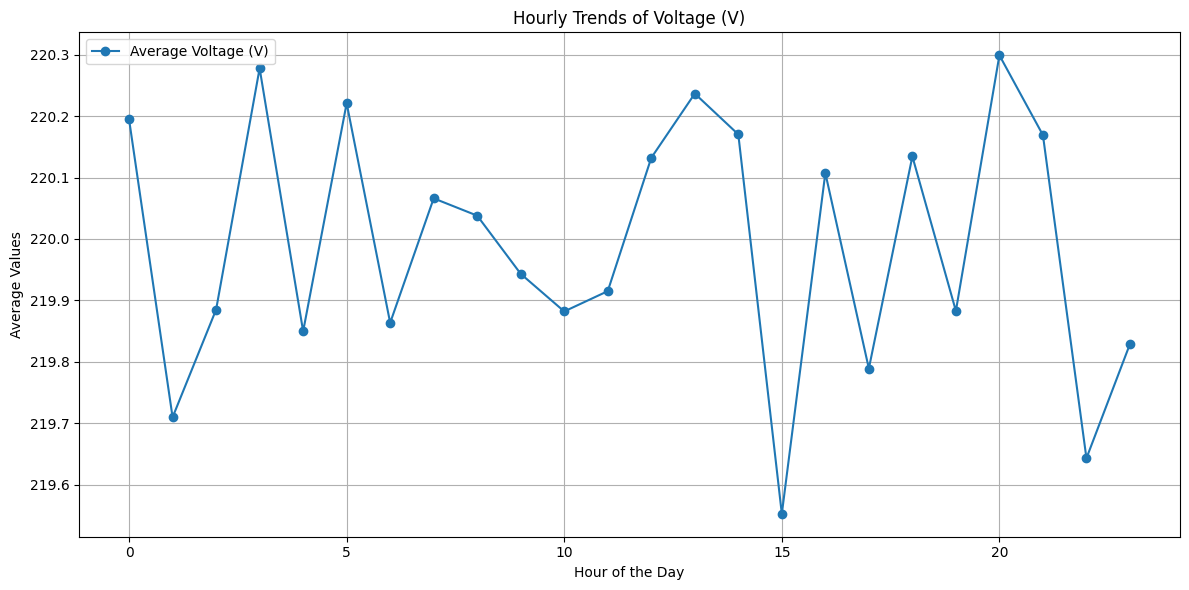

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_averages.index, hourly_averages['Voltage (V)'], label='Average Voltage (V)', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Values')
plt.title('Hourly Trends of Voltage (V)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

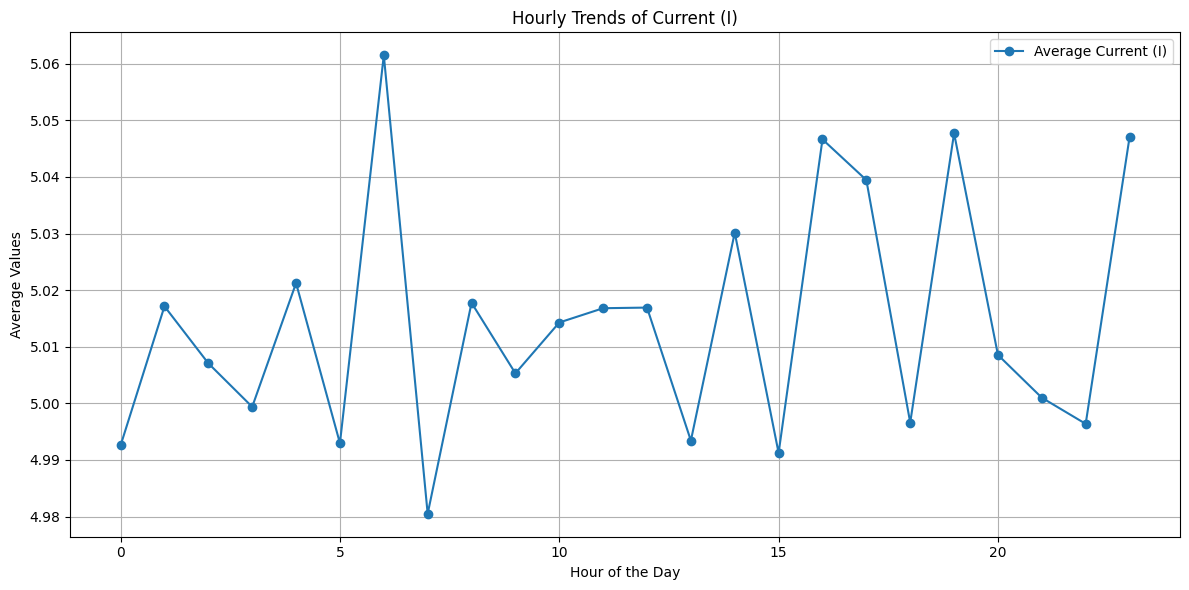

In [123]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_averages.index, hourly_averages['Current (I)'], label='Average Current (I)', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Values')
plt.title('Hourly Trends of Current (I)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Categorizing the 'Humidity (%)' into bins:

In [124]:
bins = [0, 50, 60, 70]  # Bins for Low, Medium, and High categories
labels = ['Low', 'Medium', 'High']
elec['Humidity_Category'] = pd.cut(elec['Humidity (%)'], bins=bins, labels=labels, right=False)
category_encoding = {'Low': 0, 'Medium': 1, 'High': 2}
elec['Humidity_Category_Encoded'] = elec['Humidity_Category'].map(category_encoding)
print(elec[['Humidity (%)', 'Humidity_Category', 'Humidity_Category_Encoded']].head())

   Humidity (%) Humidity_Category Humidity_Category_Encoded
0     45.494834               Low                         0
1     46.477508               Low                         0
2     64.195316              High                         2
3     37.214868               Low                         0
4     55.741660            Medium                         1


Computing the Pearson correlation matrix

In [125]:
numerical_data = elec.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
strongest_correlation = correlation_matrix.where(~correlation_matrix.isna()).stack().drop_duplicates()
strongest_pair = strongest_correlation[strongest_correlation != 1].idxmax()
strongest_value = strongest_correlation[strongest_correlation != 1].max()
print("Pearson Correlation Matrix:")
print(correlation_matrix)
print(f"\nThe pair of features most strongly correlated are {strongest_pair} with a correlation of {strongest_value:.2f}.")

Pearson Correlation Matrix:
                   Voltage (V)  Current (I)  Power (W)  Power_Factor  \
Voltage (V)           1.000000    -0.004613   0.160901     -0.007033   
Current (I)          -0.004613     1.000000   0.846689     -0.023115   
Power (W)             0.160901     0.846689   1.000000     -0.016167   
Power_Factor         -0.007033    -0.023115  -0.016167      1.000000   
Temperature (°C)     -0.005455    -0.005772  -0.007312     -0.004044   
Humidity (%)          0.011155     0.009630   0.023447     -0.018468   
Energy_Efficiency     0.150925     0.797546   0.945287      0.308257   
Hour                 -0.003265     0.007741  -0.000379      0.001588   

                   Temperature (°C)  Humidity (%)  Energy_Efficiency      Hour  
Voltage (V)               -0.005455      0.011155           0.150925 -0.003265  
Current (I)               -0.005772      0.009630           0.797546  0.007741  
Power (W)                 -0.007312      0.023447           0.945287 -0.000379  

Spliting the data into train and test sets (80:20 ratio)

In [126]:
data = elec.drop(columns=['Timestamp'])
X = data.drop(columns=['Power (W)'])  # Features
y = data['Power (W)']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8000, 10)
X_test shape: (2000, 10)
y_train shape: (8000,)
y_test shape: (2000,)
